**MODEL XÂY DỰNG TỪ CÔNG THỨC**

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Đường dẫn tương đối tới file CSV
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'dataset.csv')

df = pd.read_csv(file_path)
print(df)

    Lương  Thời gian làm việc  Cho vay
0      10                1.00        1
1       5                2.00        1
2       6                1.80        1
3       7                1.00        1
4       8                2.00        1
5       9                0.50        1
6       4                3.00        1
7       5                2.50        1
8       8                1.00        1
9       4                2.50        1
10      8                0.10        0
11      7                0.15        0
12      4                1.00        0
13      5                0.80        0
14      7                0.30        0
15      4                1.00        0
16      5                0.50        0
17      6                0.30        0
18      7                0.20        0
19      8                0.15        0


In [3]:
data = df.values

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Sử dụng Gradient Descent để giảm dần các loss:
[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]
[11.34455593]
[11.22796382]
[11.02570355]
[10.91881102]
[10.74211332]
[10.64364326]
[10.49198407]
[10.40156765]
[10.27334863]
[10.19110203]
[10.08403294]
[10.01018498]
[9.92158252]
[9.85619039]
[9.78321018]
[9.72599049]
[9.66581037]
[9.61609685]
[9.56606508]
[9.52287899]
[9.48063066]
[9.44282419]
[9.40636077]
[9.37277831]
[9.34050283]
[9.31011155]
[9.28081799]
[9.252781]
[9.22560668]
[9.19929876]
[9.1736558]
[9.14863912]
[9.12414184]
[9.10012349]
[9.07652441]
[9.05331276]
[9.03045303]
[9.007922]
[8.98569682]
[8.96376049]
[8.94209698]
[8.92069328]
[8.8995372]
[8.87861825]
[8.85792654]
[8.83745323]
[8.81718992]
[8.79712892]
[8.77726292]
[8.7575851]
[8.73808899]
[8.718

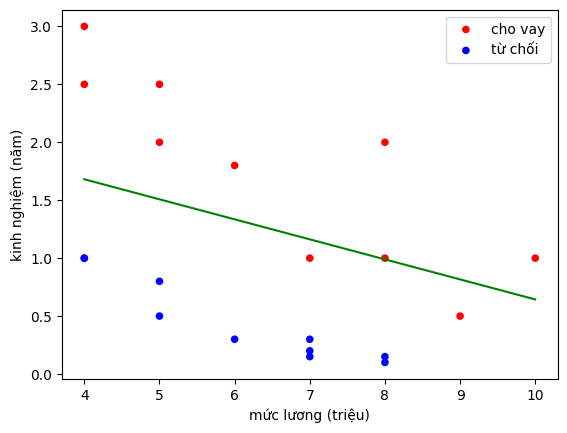

In [5]:
# Chuẩn hoá dữ liệu
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

#Bias trick: Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)


#Thực hiện gradient descent và tính giá trị dự đoán
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
print('Sử dụng Gradient Descent để giảm dần các loss:')
for i in range(1, numOfIteration):
    # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + \
    np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    print(cost[i])


# Vẽ đường phân cách.
t = 0.8 #Ngưỡng cho vay của ngân hàng
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ \
np.log(1/t-1))/w[2]), 'g')
plt.show()

**MÔ HÌNH TỪ THƯ VIỆN SCIKIT-LEARN**

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\4186857739.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wg[0, 0] = logreg.intercept_


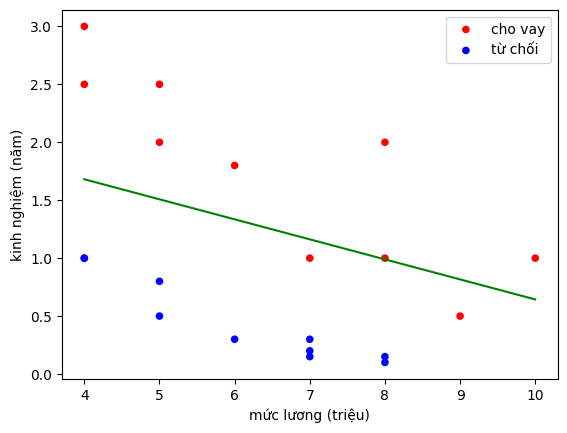

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load data từ file csv
data_sci = pd.read_csv('D:/Deep-Learning-C-B-n/Logistic Regression/dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1]
y = data[:, d-1]

# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# Tạo mô hình Logistic Regression và train
logreg = LogisticRegression()
logreg.fit(x, y)

# Lưu các biến của mô hình vào mảng
wg = np.zeros((3, 1))
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_.flatten()

# Vẽ đường phân cách
t = 0.8 #Ngưỡng cho vay của ngân hàng
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ \
np.log(1/t-1))/w[2]), 'g')
plt.show()
plt.show()
